In [12]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import re
from PIL import Image,ImageOps

## Read Json files name

In [2]:
hate_data = [f for f in listdir('hateful_memes') if isfile(join('hateful_memes', f))]

In [3]:
hate_data

['dev_unseen.jsonl',
 'test_seen.jsonl',
 'dev_seen.jsonl',
 'train.jsonl',
 'README.md',
 'NLP_final_projetc_fb.ipynb',
 'LICENSE.txt',
 'test_unseen.jsonl']

### Select json file

In [4]:
josn_files_name = [i for i in hate_data if i.split('.')[1]=='jsonl']

In [5]:
josn_files_name_complete = ['hateful_memes/'+i for i in josn_files_name]
josn_files_name_complete

['hateful_memes/dev_unseen.jsonl',
 'hateful_memes/test_seen.jsonl',
 'hateful_memes/dev_seen.jsonl',
 'hateful_memes/train.jsonl',
 'hateful_memes/test_unseen.jsonl']

### read json file as dict

In [6]:
id_list = []
img_list = []
lable_list = []
text_list = []
wrong_line = []
for i in josn_files_name_complete:
    f = open(i).read()
    f_list = f.split('\n')
    for j in f_list:
        try:
            transfer_to_json = json.loads(str(j))
            id_list.append(transfer_to_json['id'])
            img_list.append('hateful_memes/'+transfer_to_json['img'])
            lable_list.append(transfer_to_json['label'])
            text_list.append(transfer_to_json['text'])
        except:
            wrong_line.append(j)

In [7]:
dataset = pd.DataFrame({'id':id_list, 'img':img_list, 'lable':lable_list, 'text':text_list})
dataset.head()

,id,img,lable,text
0,76432,hateful_memes/img/76432.png,0,you thinking what i'm thinking?
1,14270,hateful_memes/img/14270.png,0,a brilliant mind
2,56947,hateful_memes/img/56947.png,0,"pro gamer 6.000.000 kills, 1 death"
3,35174,hateful_memes/img/35174.png,0,lets end poaching
4,39264,hateful_memes/img/39264.png,0,my wife called me a good husband thats a huge ...


### Split into train and test

In [8]:
train = dataset.sample(frac=0.8, random_state=42)
test = dataset.drop(train.index)

In [9]:
train.head()

,id,img,lable,text
9526,61928,hateful_memes/img/61928.png,0,because of this guy i have multiple profile di...
2984,40217,hateful_memes/img/40217.png,0,2 years on the job... 4 million jobs gained 1 ...
6247,76582,hateful_memes/img/76582.png,0,how my friends introduce me she's our friend a...
9932,93245,hateful_memes/img/93245.png,0,when you tease your husband in public
7354,63418,hateful_memes/img/63418.png,0,damn! who am i gonna have to fuck to get this ...


In [10]:
test.head()

,id,img,lable,text
1,14270,hateful_memes/img/14270.png,0,a brilliant mind
4,39264,hateful_memes/img/39264.png,0,my wife called me a good husband thats a huge ...
5,18564,hateful_memes/img/18564.png,0,early america was cruel
9,51940,hateful_memes/img/51940.png,0,giving birth to a baby is one of the most memo...
11,30186,hateful_memes/img/30186.png,0,get you a man who will never lay a finger on y...


In [11]:
#img = Image.open('hateful_memes/img/30186.png')

In [12]:
# new_img = tf.keras.preprocessing.image.smart_resize(
#     img, (2000,2000), interpolation='bilinear'
# )
# new_img = tf.keras.utils.array_to_img(
#     new_img, data_format=None, scale=True, dtype=None
# )

### let image size become same

In [13]:
train_label = list(train.lable)
test_label = list(test.lable)
train_img = list(train.img)
test_img = list(test.img)

0=not-hateful, 1=hateful

In [15]:
import tensorflow as tf

In [28]:
def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b: 
                return False
    return True

In [48]:
for i in range(len(train_img)):
    imag1 = Image.open(train_img[i])
    if is_grey_scale(train_img[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (100,100), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if train_label[i]==1:
        imag1.save("fb_train/hate/"+(train_img[i].split('/'))[-1], 'PNG')
    else:
        imag1.save("fb_train/nothate/"+(train_img[i].split('/'))[-1], 'PNG')

In [50]:
for i in range(len(test_img)):
    imag1 = Image.open(test_img[i])
    if is_grey_scale(test_img[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (100,100), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if test_label[i]==1:
        imag1.save("fb_test/hate/"+(test_img[i].split('/'))[-1], 'PNG')
    else:
        imag1.save("fb_test/nothate/"+(test_img[i].split('/'))[-1], 'PNG')

# 1. Image Classification

## Build model

In [279]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [225]:
train_hate = [f for f in listdir('fb_train/hate/') if isfile(join('fb_train/hate/', f))]
train_nothate = [f for f in listdir('fb_train/nothate/') if isfile(join('fb_train/nothate/', f))]
test_hate = [f for f in listdir('fb_test/hate/') if isfile(join('fb_test/hate/', f))]
test_hate = [f for f in listdir('fb_test/hate/') if isfile(join('fb_test/hate/', f))]

In [226]:
train_dataset_name = []
train_dataset_label = []
for i in range(len(train_hate)):
    train_dataset_name.append('fb_train/hate/'+train_hate[i])
    train_dataset_label.append(1)
for i in range(len(train_nothate)):
    train_dataset_name.append('fb_train/nothate/'+train_nothate[i])
    train_dataset_label.append(0)

In [238]:
image_size = (100, 100)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fb_train",
    image_size=image_size,
    batch_size=batch_size,
)

Found 9766 files belonging to 3 classes.


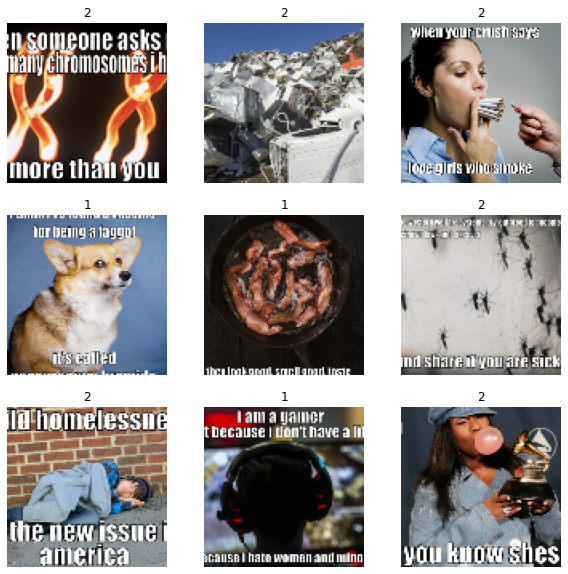

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [273]:
from keras.preprocessing.image import ImageDataGenerator

In [274]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [275]:
training_set = train_datagen.flow_from_directory('fb_train', target_size=(1000, 1000), batch_size=32, class_mode='binary')

Found 9766 images belonging to 3 classes.


In [276]:
test_set = train_datagen.flow_from_directory('fb_test', target_size=(1000, 1000), batch_size=32, class_mode='binary')

Found 2494 images belonging to 3 classes.


In [352]:
from keras.applications.densenet import DenseNet201,preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [353]:
base_model = DenseNet201(include_top=False)

In [354]:
x = base_model.output
x = GlobalAveragePooling2D()(x) 
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [355]:
def add_new_last_layer(base_model, nb_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(nb_classes, activation='sigmoid')(x)
    model = Model(base_model.input, predictions)
    return model

In [356]:
model = DenseNet201(include_top=False)
model = add_new_last_layer(model, 1)

In [357]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [358]:
history_ft = model.fit_generator(
training_set, steps_per_epoch=100, epochs=10, validation_data=test_set, validation_steps=1000)

Epoch 1/10


ValueError: in user code:

    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 3) vs (None, 1)).


In [196]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow import random
import numpy as np

In [197]:
import tensorflow as tf

In [198]:
import keras

In [199]:
np.random.seed(42)
random.set_seed(42)

In [200]:
classifier = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
)

In [201]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
from keras.preprocessing.image import ImageDataGenerator

In [203]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [204]:
training_set = train_datagen.flow_from_directory('fb_train', target_size=(1000, 1000), batch_size=32, class_mode='binary')

Found 9766 images belonging to 3 classes.


In [205]:
test_set = train_datagen.flow_from_directory('fb_test', target_size=(1000, 1000), batch_size=32, class_mode='binary')

Found 2494 images belonging to 3 classes.


In [149]:
classifier.fit_generator(training_set, steps_per_epoch=100, epochs=10, validation_data=test_set, validation_steps=30, shuffle=False)

Epoch 1/10


InvalidArgumentError: 2 root error(s) found.
  (0) INVALID_ARGUMENT:  Input to reshape is a tensor with 15745024 values, but the requested shape requires a multiple of 25088
	 [[node sequential_4/flatten/Reshape
 (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py:96)
]]
	 [[binary_crossentropy/logistic_loss/_14]]
  (1) INVALID_ARGUMENT:  Input to reshape is a tensor with 15745024 values, but the requested shape requires a multiple of 25088
	 [[node sequential_4/flatten/Reshape
 (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py:96)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1539571]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_4/flatten/Reshape:
In[0] sequential_4/block5_pool/MaxPool (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/pooling.py:357)	
In[1] sequential_4/flatten/Const (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py:91)

Operation defined at: (most recent call last)
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/0f/brs6kj9d6bbftjh0sk1763yh0000gn/T/ipykernel_5348/1446771623.py", line 1, in <module>
>>>     classifier.fit_generator(training_set, steps_per_epoch=100, epochs=10, validation_data=test_set, validation_steps=1000, shuffle=False)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 2016, in fit_generator
>>>     return self.fit(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py", line 96, in call
>>>     return tf.reshape(inputs, flattened_shape)
>>> 

Input Source operations connected to node sequential_4/flatten/Reshape:
In[0] sequential_4/block5_pool/MaxPool (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/pooling.py:357)	
In[1] sequential_4/flatten/Const (defined at /Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py:91)

Operation defined at: (most recent call last)
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/0f/brs6kj9d6bbftjh0sk1763yh0000gn/T/ipykernel_5348/1446771623.py", line 1, in <module>
>>>     classifier.fit_generator(training_set, steps_per_epoch=100, epochs=10, validation_data=test_set, validation_steps=1000, shuffle=False)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 2016, in fit_generator
>>>     return self.fit(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/zeyu/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/core/flatten.py", line 96, in call
>>>     return tf.reshape(inputs, flattened_shape)
>>> 

Function call stack:
train_function -> train_function


## Sava and load model

In [13]:
classifier.save('saved_model/nlp_final_image')

2021-12-21 02:16:02.621660: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/nlp_final_image/assets


In [5]:
new_model = tf.keras.models.load_model('saved_model/nlp_final_image')

2021-12-22 15:09:48.191846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-22 15:09:48.192302: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [6]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 333, 333, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                    

## Prediction

In [7]:
from keras.preprocessing import image

In [8]:
new_image = image.img_to_array(new_image)

NameError: name 'new_image' is not defined

In [9]:
new_imag1 = np.expand_dims(new_image, axis=0)

NameError: name 'np' is not defined

In [10]:
result = new_model.predict(new_imag1)

NameError: name 'new_imag1' is not defined

In [95]:
if result[0][0] == 1:
    print(f'Is hate')
else:
    print(f'not hate')

Is hate


## Prediction on our dataset

In [14]:
hate_image = [f for f in listdir('hate') if isfile(join('hate', f))]

In [ ]:
nothate_image = [f for f in listdir('NotHate') if isfile(join('NotHate', f))]

In [ ]:
image_name = []
image_expendarray = []
predict_label = []
for i in hate_image:
    new_image = image.load_img('hate/'+i)
    new_image = resize_with_padding(new_image, (1000, 1000))
    new_image = image.img_to_array(new_image)
    new_imag1 = np.expand_dims(new_image, axis=0)
    result = new_model.predict(new_imag1)
    image_name.append(i)
    predict_label.append(result[0][0])
for i in nothate_image:
    new_image = image.load_img('NotHate/'+i)
    new_image = resize_with_padding(new_image, (1000, 1000))
    new_image = image.img_to_array(new_image)
    new_imag1 = np.expand_dims(new_image, axis=0)
    result = new_model.predict(new_imag1)
    image_name.append(i)
    predict_label.append(result[0][0])

NameError: name 'resize_with_padding' is not defined

# 2. Text

In [31]:
train.to_csv('nlp_fb_train.csv')

In [32]:
test.to_csv('nlp_fb_test.csv')

In [4]:
!pip install -q -U tensorflow.tensorflow_text

ERROR: Could not find a version that satisfies the requirement tensorflow.tensorflow_text (from versions: none)
ERROR: No matching distribution found for tensorflow.tensorflow_text
